In [129]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from dataprep.eda import create_report
from pycaret.regression import *
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
df = pd.read_pickle('data/final_dataframe.pkl')
df.head()

,key,speed,Pelvis_acc_0mean,Pelvis_acc_0std,Pelvis_acc_1mean,Pelvis_acc_1std,Pelvis_acc_2mean,Pelvis_acc_2std,Pelvis_angular_acc_0mean,Pelvis_angular_acc_0std,...,LeftFoot_ori_2mean,LeftFoot_ori_2std,LeftFoot_ori_3mean,LeftFoot_ori_3std,LeftFoot_pos_0mean,LeftFoot_pos_0std,LeftFoot_pos_1mean,LeftFoot_pos_1std,LeftFoot_pos_2mean,LeftFoot_pos_2std
0,2017_10_1,79.0,0.118889,6.027762,0.027525,5.008630,0.047523,6.035592,0.023546,27.730606,...,0.165069,0.203608,-0.260643,0.243014,5.574961,2.845814,7.602339,1.373352,0.203275,0.057795
1,2017_10_2,82.0,-0.055757,6.241045,0.037591,4.849446,0.028313,5.708206,-0.001195,24.883818,...,0.175077,0.212366,-0.238963,0.234664,5.598771,2.783792,7.851223,1.363163,0.211607,0.056276
2,2017_10_3,78.0,-0.011518,6.504512,-0.034417,5.052209,0.069457,6.443381,0.097228,25.881138,...,0.200335,0.223304,-0.271918,0.228157,5.872924,2.884502,8.030355,1.295045,0.217697,0.063391
3,2017_10_4,77.0,-0.008342,5.849470,0.066699,4.555651,-0.018930,5.330553,-0.000194,22.212814,...,0.163471,0.197847,-0.224923,0.260938,6.246395,3.081277,7.963341,1.467437,0.211896,0.056749
4,2017_10_5,78.0,-0.009478,6.032136,0.025189,4.884982,-0.001451,5.565096,0.004020,23.755271,...,0.182268,0.209939,-0.246841,0.251010,6.260168,3.035771,8.015781,1.443887,0.216884,0.063552


In [131]:
df.loc[:, 'body'] = df.key.apply(lambda k: str.split(k, '_')[1]).astype(int)
df.head()

,key,speed,Pelvis_acc_0mean,Pelvis_acc_0std,Pelvis_acc_1mean,Pelvis_acc_1std,Pelvis_acc_2mean,Pelvis_acc_2std,Pelvis_angular_acc_0mean,Pelvis_angular_acc_0std,...,LeftFoot_ori_2std,LeftFoot_ori_3mean,LeftFoot_ori_3std,LeftFoot_pos_0mean,LeftFoot_pos_0std,LeftFoot_pos_1mean,LeftFoot_pos_1std,LeftFoot_pos_2mean,LeftFoot_pos_2std,body
0,2017_10_1,79.0,0.118889,6.027762,0.027525,5.008630,0.047523,6.035592,0.023546,27.730606,...,0.203608,-0.260643,0.243014,5.574961,2.845814,7.602339,1.373352,0.203275,0.057795,10
1,2017_10_2,82.0,-0.055757,6.241045,0.037591,4.849446,0.028313,5.708206,-0.001195,24.883818,...,0.212366,-0.238963,0.234664,5.598771,2.783792,7.851223,1.363163,0.211607,0.056276,10
2,2017_10_3,78.0,-0.011518,6.504512,-0.034417,5.052209,0.069457,6.443381,0.097228,25.881138,...,0.223304,-0.271918,0.228157,5.872924,2.884502,8.030355,1.295045,0.217697,0.063391,10
3,2017_10_4,77.0,-0.008342,5.849470,0.066699,4.555651,-0.018930,5.330553,-0.000194,22.212814,...,0.197847,-0.224923,0.260938,6.246395,3.081277,7.963341,1.467437,0.211896,0.056749,10
4,2017_10_5,78.0,-0.009478,6.032136,0.025189,4.884982,-0.001451,5.565096,0.004020,23.755271,...,0.209939,-0.246841,0.251010,6.260168,3.035771,8.015781,1.443887,0.216884,0.063552,10


In [132]:
demographics = pd.read_excel('data/demographics.xlsx')
demographics.drop(columns=['Testing year', 'Date of testing', 'Date of birth'], inplace=True)
demographics.sort_values(by='Bodynr.').head(100)

,Bodynr.,Age,Gender,Age group
0,1,14.0,F,U16
23,1,14.0,F,U16
3,2,15.0,F,U16
4,3,15.0,F,U16
24,3,15.0,F,U16
...,...,...,...,...
93,79,19.0,M,U21
86,80,16.0,F,U18
87,81,16.0,M,U18
90,82,17.0,M,U18


<AxesSubplot: >

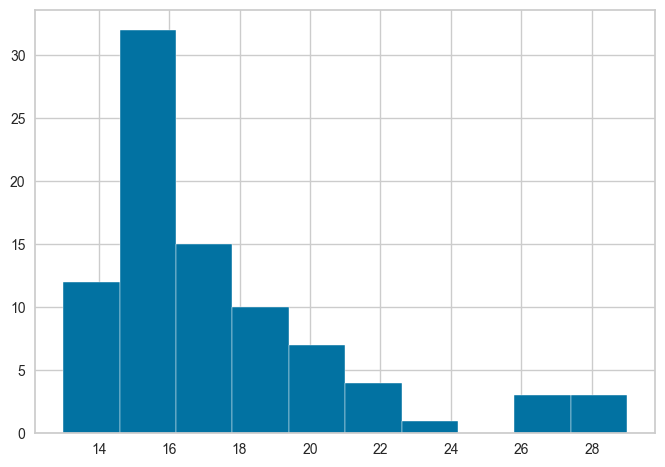

In [133]:
demographics.Age.hist()

<AxesSubplot: >

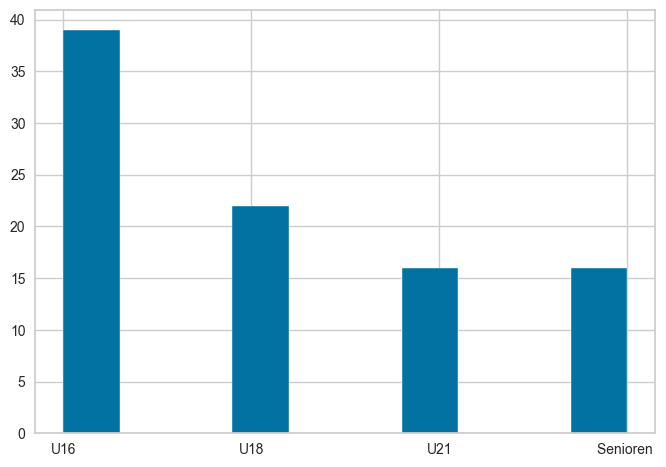

In [134]:
demographics['Age group'].hist()

<AxesSubplot: >

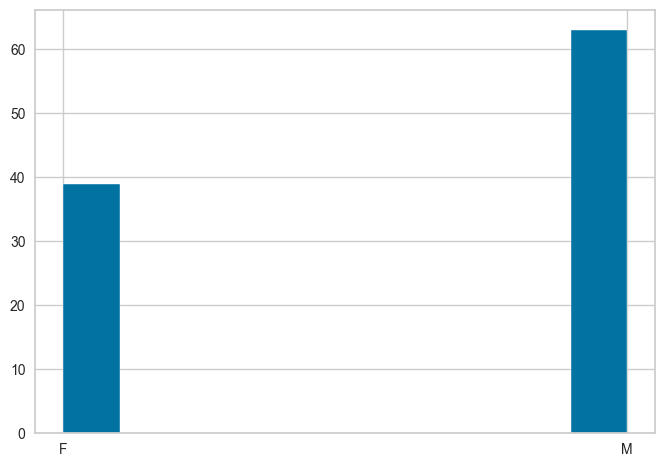

In [135]:
demographics.Gender.hist()

In [136]:
demographics['Bodynr.'].value_counts()  # there are multiple instances per user

12    3
13    3
1     2
14    2
17    2
     ..
36    1
37    1
41    1
42    1
85    1
Name: Bodynr., Length: 80, dtype: int64

In [137]:
print("Demographics length before dropping duplicates: {}".format(demographics.shape[0]))
demographics = demographics.drop_duplicates(subset='Bodynr.', keep='first')
print("Demographics length after dropping duplicates: {}".format(demographics.shape[0]))

Demographics length before dropping duplicates: 102
Demographics length after dropping duplicates: 80


In [138]:
merged = df.merge(demographics, how='left', left_on='body', right_on='Bodynr.')
merged.head(100)

,key,speed,Pelvis_acc_0mean,Pelvis_acc_0std,Pelvis_acc_1mean,Pelvis_acc_1std,Pelvis_acc_2mean,Pelvis_acc_2std,Pelvis_angular_acc_0mean,Pelvis_angular_acc_0std,...,LeftFoot_pos_0std,LeftFoot_pos_1mean,LeftFoot_pos_1std,LeftFoot_pos_2mean,LeftFoot_pos_2std,body,Bodynr.,Age,Gender,Age group
0,2017_10_1,79.0,0.118889,6.027762,0.027525,5.008630,0.047523,6.035592,0.023546,27.730606,...,2.845814,7.602339,1.373352,0.203275,0.057795,10,10,15.0,M,U16
1,2017_10_2,82.0,-0.055757,6.241045,0.037591,4.849446,0.028313,5.708206,-0.001195,24.883818,...,2.783792,7.851223,1.363163,0.211607,0.056276,10,10,15.0,M,U16
2,2017_10_3,78.0,-0.011518,6.504512,-0.034417,5.052209,0.069457,6.443381,0.097228,25.881138,...,2.884502,8.030355,1.295045,0.217697,0.063391,10,10,15.0,M,U16
3,2017_10_4,77.0,-0.008342,5.849470,0.066699,4.555651,-0.018930,5.330553,-0.000194,22.212814,...,3.081277,7.963341,1.467437,0.211896,0.056749,10,10,15.0,M,U16
4,2017_10_5,78.0,-0.009478,6.032136,0.025189,4.884982,-0.001451,5.565096,0.004020,23.755271,...,3.035771,8.015781,1.443887,0.216884,0.063552,10,10,15.0,M,U16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2017_3_6,70.0,-0.214130,6.503841,0.147309,5.368655,0.008332,5.887835,0.011580,31.645670,...,3.610861,3.837694,6.559838,0.219254,0.160991,3,3,15.0,F,U16
96,2017_3_7,71.0,-0.211267,6.675392,0.051838,5.748093,-0.015382,6.473723,0.005122,31.205272,...,3.757200,4.739786,6.320663,0.225272,0.157280,3,3,15.0,F,U16
97,2017_3_8,71.0,-0.530415,8.446381,0.113373,6.317973,0.112313,6.309615,-0.020152,39.537020,...,1.808065,4.886853,7.398510,0.213426,0.169119,3,3,15.0,F,U16
98,2017_3_9,70.0,0.056685,7.743416,-0.174644,6.511832,0.099733,6.756341,0.021539,37.570063,...,1.811757,-1.309840,1.480794,0.189831,0.136135,3,3,15.0,F,U16


In [139]:
merged.Gender.value_counts()

M    248
F    190
Name: Gender, dtype: int64

In [140]:
merged.to_pickle('data/final_dataframe_gender_age.pkl')

## Generic Model with added Demographics Features

In [141]:
fold_groups = merged.key
merged_with_key = merged.drop(columns=['body', 'Bodynr.'])
merged = merged.drop(columns=['body', 'Bodynr.', 'key'])

In [119]:
model = setup(data = merged, target = 'speed', silent=True, session_id=123, normalize = True, fold_strategy='groupkfold', fold=10,  fold_groups=fold_groups)

,Description,Value
0,session_id,123
1,Target,speed
2,Original Data,"(438, 840)"
3,Missing Values,False
4,Numeric Features,837
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(306, 638)"


create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='speed',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                                                  target='speed')),
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dummy', Dumm

In [120]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3.5811,22.8347,4.6685,0.7454,0.0616,0.0479,0.4800
lightgbm,Light Gradient Boosting Machine,3.8118,24.6512,4.8767,0.7242,0.0645,0.0508,0.4780
ada,AdaBoost Regressor,3.9329,25.4137,4.9930,0.7222,0.0653,0.0522,0.4420
gbr,Gradient Boosting Regressor,3.7363,25.0368,4.9185,0.7196,0.0651,0.0500,0.9570
rf,Random Forest Regressor,3.7873,25.3728,4.9728,0.7189,0.0652,0.0506,0.8720
br,Bayesian Ridge,4.0973,27.5252,5.2031,0.6918,0.0690,0.0545,0.1450
en,Elastic Net,4.6288,34.3716,5.8357,0.6249,0.0778,0.0621,0.0190
lasso,Lasso Regression,4.9276,37.7664,6.1169,0.5932,0.0812,0.0660,0.0100
knn,K Neighbors Regressor,4.6269,37.4768,6.0619,0.5872,0.0787,0.0607,0.0270
omp,Orthogonal Matching Pursuit,4.8833,38.0081,6.1283,0.5727,0.0810,0.0645,0.0210


create_model_container: 17
master_model_container: 17
display_container: 2
ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)
compare_models() succesfully completed......................................


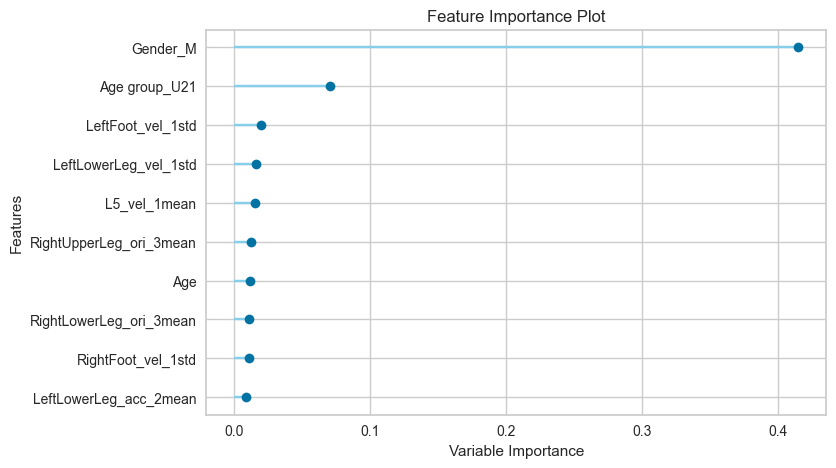

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [121]:
plot_model(best, plot='feature')

## Personalized Models based on Gender

In [142]:
merged_f = merged.loc[merged.Gender == 'F', :]
key_f = merged_with_key.loc[merged_with_key.Gender == 'F', "key"]
merged_m = merged.loc[merged.Gender == 'M', :]
key_m = merged_with_key.loc[merged_with_key.Gender == 'M', "key"]
key_f

51      2017_1_1
58     2017_26_2
59     2017_26_3
60     2017_26_4
61     2017_26_5
         ...    
426    2021_80_4
427    2021_80_5
428    2021_80_6
429    2021_80_7
430    2021_80_8
Name: key, Length: 190, dtype: object

### Model for Males

In [143]:
model_m = setup(data = merged_m, target = 'speed', silent=True, session_id=123, normalize = True, fold_strategy='groupkfold', fold=10,  fold_groups=key_m)

,Description,Value
0,session_id,123
1,Target,speed
2,Original Data,"(248, 840)"
3,Missing Values,False
4,Numeric Features,837
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(173, 642)"


create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='speed',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                                                  target='speed')),
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dummy', Dumm

In [144]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,3.8514,25.9800,4.9237,0.4225,0.0593,0.0471,0.1480
en,Elastic Net,4.0017,27.2709,5.0494,0.4140,0.0604,0.0488,0.0180
et,Extra Trees Regressor,3.8588,27.0964,4.9907,0.4067,0.0606,0.0473,0.2130
br,Bayesian Ridge,4.1007,29.0530,5.2160,0.3805,0.0625,0.0500,0.0710
gbr,Gradient Boosting Regressor,3.9385,29.0129,5.1296,0.3568,0.0617,0.0482,0.3510
lasso,Lasso Regression,4.2431,30.4705,5.3652,0.3411,0.0642,0.0517,0.0100
rf,Random Forest Regressor,4.0883,29.4923,5.2432,0.3335,0.0626,0.0498,0.4110
knn,K Neighbors Regressor,3.8833,27.9951,5.1760,0.3144,0.0616,0.0471,0.0220
lightgbm,Light Gradient Boosting Machine,4.2191,32.5023,5.5425,0.2128,0.0666,0.0517,0.0970
llar,Lasso Least Angle Regression,5.6998,59.7241,7.5625,-0.1550,0.0885,0.0682,0.0180


create_model_container: 18
master_model_container: 18
display_container: 2
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)
compare_models() succesfully completed......................................


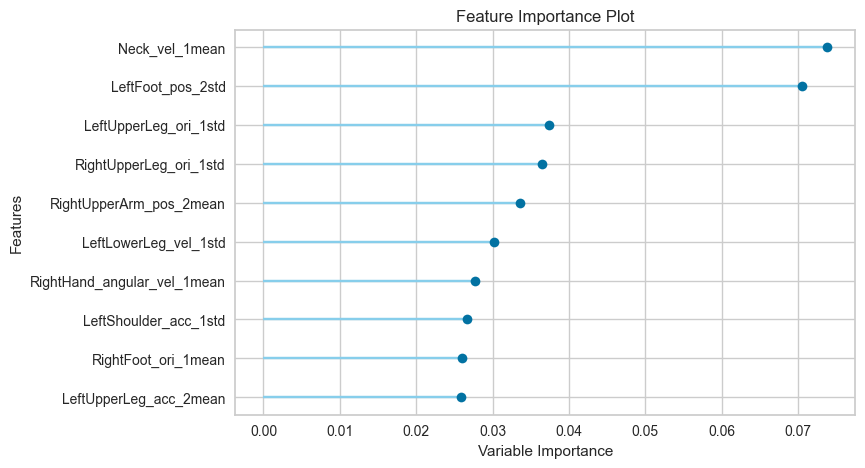

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [145]:
plot_model(best, plot='feature')

### Model for Females

In [146]:
model_f = setup(data = merged_f, target = 'speed', silent=True, session_id=123, normalize = True, fold_strategy='groupkfold', fold=10,  fold_groups=key_f)

,Description,Value
0,session_id,123
1,Target,speed
2,Original Data,"(190, 840)"
3,Missing Values,False
4,Numeric Features,837
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(132, 627)"


create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='speed',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                                                  target='speed')),
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dummy', Dumm

In [147]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3.1674,17.7014,4.1189,0.5892,0.0594,0.0465,0.1500
ada,AdaBoost Regressor,3.5342,20.4033,4.4336,0.5447,0.0636,0.0517,0.1170
knn,K Neighbors Regressor,3.5173,22.1410,4.6202,0.5256,0.0665,0.0518,0.0170
br,Bayesian Ridge,3.5248,20.5417,4.4656,0.5159,0.0641,0.0518,0.0350
rf,Random Forest Regressor,3.6692,22.1112,4.5997,0.5144,0.0660,0.0536,0.2630
lightgbm,Light Gradient Boosting Machine,3.4712,21.0705,4.4407,0.5096,0.0643,0.0513,0.1100
en,Elastic Net,3.7776,23.5716,4.7736,0.5015,0.0680,0.0550,0.0070
gbr,Gradient Boosting Regressor,3.6235,21.4643,4.5831,0.4913,0.0650,0.0525,0.2590
lasso,Lasso Regression,4.4288,31.8097,5.5019,0.3494,0.0782,0.0644,0.0070
ridge,Ridge Regression,4.3734,33.0477,5.7015,0.2132,0.0825,0.0641,0.0070


create_model_container: 17
master_model_container: 17
display_container: 2
ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)
compare_models() succesfully completed......................................


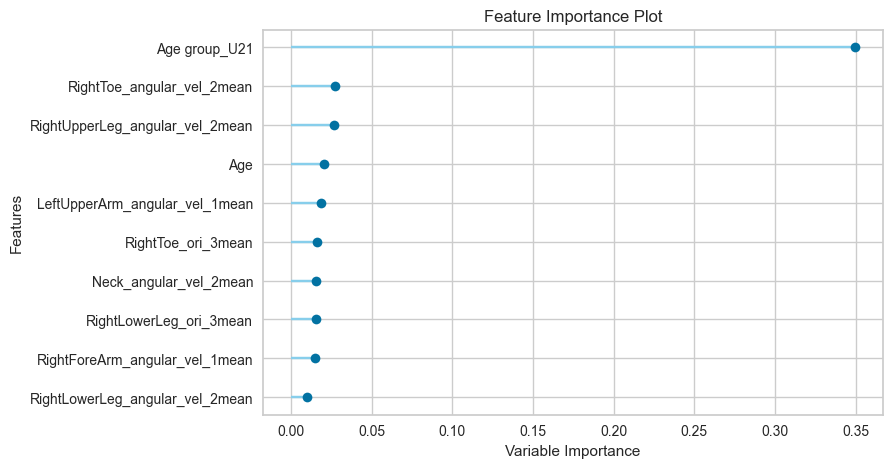

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [148]:
plot_model(best, plot='feature')

**Summary:** Men seem to not gain any advantage through personalization (further experimentation required), but for females, their MAE dropped by 0.4 km/h, or 12% improvement compared to the generic model.

------------ MALES ------------
Mean Ball Speed: 83.46370967741936 - std Balle Speed: 7.927512674605786


<AxesSubplot: >

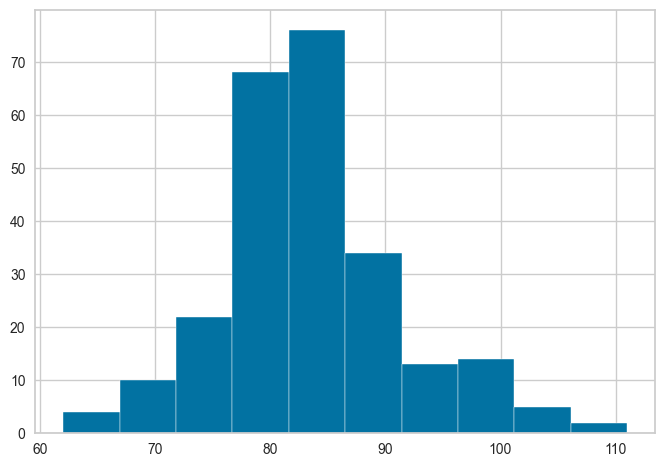

In [149]:
print("------------ MALES ------------\nMean Ball Speed: {} - std Balle Speed: {}".format(np.mean(merged_m.speed), np.std(merged_m.speed)))
merged_m.speed.hist()

------------ FEMALES ------------
Mean Ball Speed: 70.21578947368421 - std Balle Speed: 7.334185504083616


<AxesSubplot: >

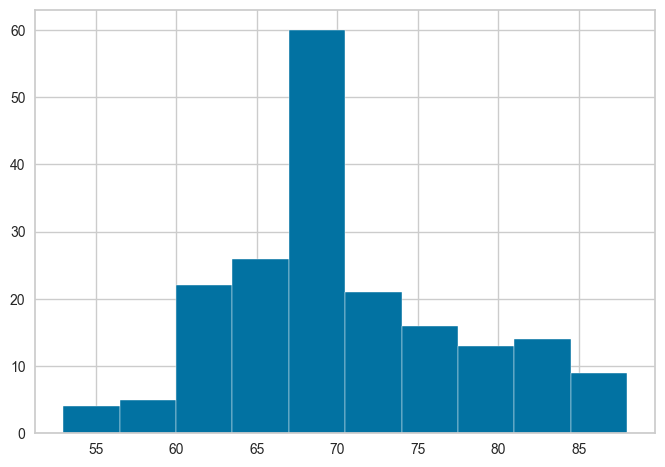

In [151]:
print("------------ FEMALES ------------\nMean Ball Speed: {} - std Balle Speed: {}".format(np.mean(merged_f.speed), np.std(merged_f.speed)))
merged_f.speed.hist()